In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_folder = '../../data/text_responses/'

# Subtlety

In [3]:
df = pd.read_csv(f'{root_folder}/subtlety/without_cover_story/data_all_subs_forQC_anonymised.csv',index_col=[0])
df.head()

,index,sub_ind,PID,date,stimset_rows,total_trials,nplanned_trialIDs,npresented_trialIDs,planned_trialIDs_all,presented_trialIDs_all,subtlety,subtlety_sorted,pred_color,pred_pos,responses,agents_type,strategy,feedback
0,0,15000,6106b17736d5140741ee5e8a,12,0,48,7,7,"['07cdb9d7-6577-428d-9498-8a7243527554', '0ea5...","['07cdb9d7-6577-428d-9498-8a7243527554', 'b726...","[0, 120, 150, 180, 30, 60, 90]","[0, 30, 60, 90, 120, 150, 180]","['grey', 'grey', 'black', 'black', 'black', 'b...","[250, 550, 550, 550, 250, 550, 250]","['grey dot following black dot', 'moving towar...",animals,trying to see patterns in behaviour,no
1,1,15001,6316270236b53462f94c6f0c,12,1,48,7,7,"['53613c0d-b07e-4b22-b6ec-56dda26edc8f', '17e4...","['17e4063d-b2f1-4406-8a8f-be7151fd23c1', '7bee...","[30, 180, 90, 120, 150, 60, 0]","[0, 30, 60, 90, 120, 150, 180]","['black', 'grey', 'black', 'black', 'grey', 'b...","[550, 250, 250, 550, 550, 550, 250]",['A black dot seemed to follow a grey dot from...,children,I pretended that the dots had some sentient ca...,NaN
2,2,15002,61099e438a2f56f2770b7cd2,12,2,48,7,7,"['19c65966-3d88-4851-afe4-ae34c498748c', '69cb...","['19c65966-3d88-4851-afe4-ae34c498748c', 'adf2...","[0, 60, 180, 30, 90, 120, 150]","[0, 30, 60, 90, 120, 150, 180]","['grey', 'grey', 'black', 'black', 'grey', 'gr...","[550, 250, 550, 250, 550, 250, 250]",['the black dot seemed to be running away from...,children,i watched if the dots were following the same ...,no
3,3,15003,60de1d590358b86167255a80,12,3,48,7,7,"['c188e383-94d7-475e-9da5-6d1f0a1184bb', '57db...","['18487641-212a-4e1e-8730-31709d721382', '57db...","[150, 30, 0, 60, 180, 120, 90]","[0, 30, 60, 90, 120, 150, 180]","['grey', 'grey', 'black', 'black', 'grey', 'bl...","[250, 550, 250, 550, 550, 250, 250]",['Grey dot was moving similarly to a snake. Bl...,something else (describe on the next page),I observed both dots to see if they were makin...,Interesting
4,4,15004,641a19d78805c5e3e319826d,12,6,48,7,7,"['49e5ac90-6e7f-4243-9552-8c4c10545895', 'c532...","['5d69d5c8-83dd-43c4-be85-f1c2ff45960d', '7e11...","[120, 150, 60, 0, 30, 180, 90]","[0, 30, 60, 90, 120, 150, 180]","['grey', 'black', 'black', 'black', 'black', '...","[550, 250, 250, 550, 250, 250, 550]","['Black dot is moving on the left, grey on the...",balls,no,no


In [4]:
df.shape

(60, 18)

In [5]:
df.groupby(['agents_type']).count().iloc[:,0]

agents_type
adults                                         5
animals                                       16
balls                                         13
children                                       5
magnets                                       13
something else (describe on the next page)     8
Name: index, dtype: int64

In [6]:
df.loc[df['agents_type']== 'something else (describe on the next page)',['strategy','feedback']].values

array([['I observed both dots to see if they were making similar movements. Also observed the distance between the dots',
        'Interesting '],
       ['Just paying full attention to the screen, no distractions',
        'It was unclear what the dots were representing'],
       ['the dots didnt move in a specific pattern linked to any of the options on the former screen',
        'No feedback'],
       ['I tended to give them personalities and reasons for their movements.',
        "It was unclear what was wanted after the test video. Wasn't sure if we needed to describe the test movements or acknowledge we understood the information present (ex. like saying we understood we needed to describe since that was the informing page). Also, unsure if the dots were meant to be anything. I didn't think so so I said 'something else' thinking I'll be saying what next page and next page was something unrelated. Just would have said 'they were just dots'. "],
       ['none', 'Nope'],
       ["I

- No description of something else - so going to drop these rows

In [7]:
df.loc[df['agents_type']== 'something else (describe on the next page)',['strategy','feedback']].shape

(8, 2)

In [8]:
df = df[df['agents_type'] != 'something else (describe on the next page)']
df.shape

(52, 18)

In [9]:
df_count = df.groupby(['agents_type']).count().iloc[:,0].reset_index()
if 'index' in df_count.columns:
    df_count.rename(columns = {'index':'count'},inplace=True)

df_count.sort_values(by=['count'],inplace=True,ascending=False)
df_count['count_pc'] = 100*df_count['count']/df_count['count'].sum()

In [10]:
results_loc = '../../results/text_analysis/subtlety/no_cover_story'

In [11]:
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

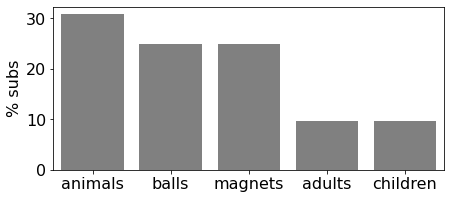

In [12]:
plt.figure(figsize=(7,3))
sns.barplot(data=df_count,x='agents_type',y='count_pc',color = 'grey')
plt.ylabel('% subs')
plt.xlabel('')
plt.savefig(f'{results_loc}/agents_type_bar.png')

In [14]:
df_count

,agents_type,count,count_pc
1,animals,16,30.769231
2,balls,13,25.000000
4,magnets,13,25.000000
0,adults,5,9.615385
3,children,5,9.615385


In [16]:
df_count['agent_type_withpc'] = [f"{row['agents_type']}\n({row['count_pc']:.1f}%)" for _,row in df_count.iterrows()]
df_count

,agents_type,count,count_pc,agent_type_withpc
1,animals,16,30.769231,animals\n(30.8%)
2,balls,13,25.000000,balls\n(25.0%)
4,magnets,13,25.000000,magnets\n(25.0%)
0,adults,5,9.615385,adults\n(9.6%)
3,children,5,9.615385,children\n(9.6%)


In [17]:
df_count['animacy'] = ['animate','inanimate','inanimate','animate','animate']
df_count

,agents_type,count,count_pc,agent_type_withpc,animacy
1,animals,16,30.769231,animals\n(30.8%),animate
2,balls,13,25.000000,balls\n(25.0%),inanimate
4,magnets,13,25.000000,magnets\n(25.0%),inanimate
0,adults,5,9.615385,adults\n(9.6%),animate
3,children,5,9.615385,children\n(9.6%),animate


In [21]:
df_count.sort_values(by=['animacy','agents_type'],inplace=True)

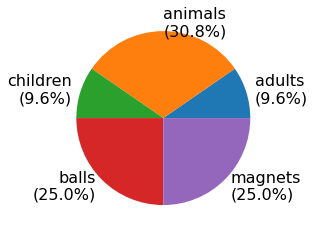

In [22]:
plt.pie(df_count['count_pc'],labels=df_count['agent_type_withpc'])
plt.savefig(f'{results_loc}/agents_type_pie.png',bbox_inches='tight')